In [1]:
# Load libraries
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;

from sklearn.preprocessing import StandardScaler, LabelEncoder;
from sklearn.linear_model import LinearRegression, Lasso, Ridge;
from sklearn.model_selection import train_test_split, cross_val_score, KFold;
from sklearn.metrics import mean_squared_error;

import warnings;

pd.set_option('max_column', None);
warnings.filterwarnings('ignore');

## 1. Load data

In [2]:
# Load dataset
data = pd.read_csv('Fish/fish.csv', sep=',');

In [3]:
# Shape the dataset
print(data.shape);

(159, 7)


In [4]:
# Peek at the dataset
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
# Informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


## 2. EDA

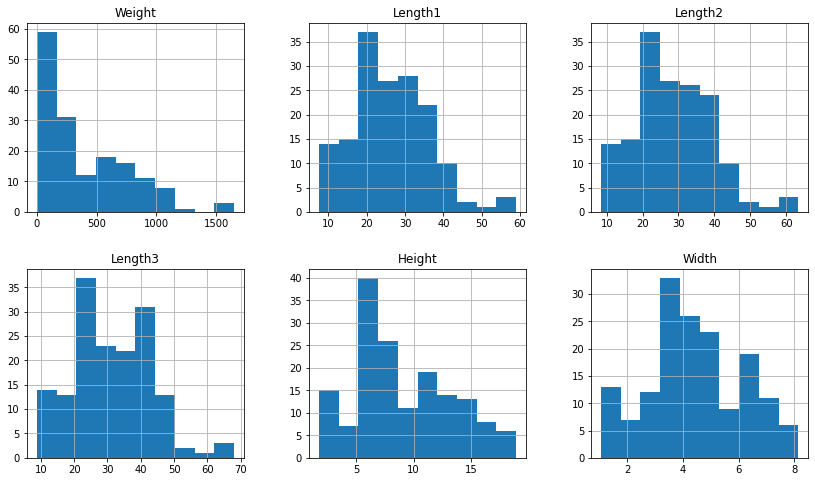

In [6]:
# Histogram
data.hist(layout=(2, 3), figsize=(14, 8));
plt.show()

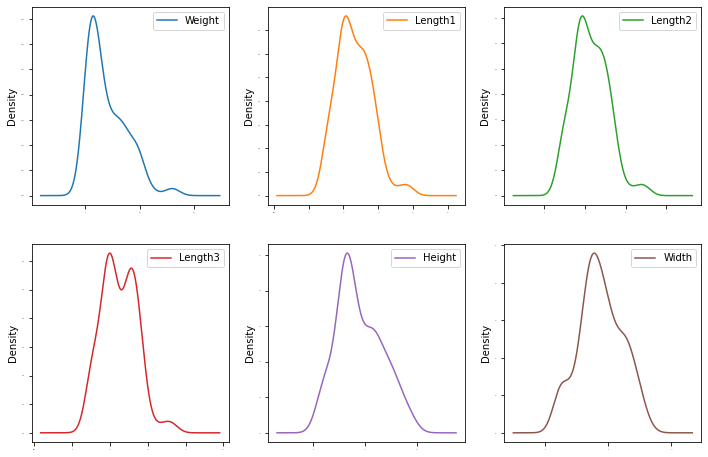

In [7]:
# Density
data.plot(kind='density', subplots=True, layout=(2,3), sharex=False, legend=True, fontsize=1, figsize=(12,8));
plt.show()

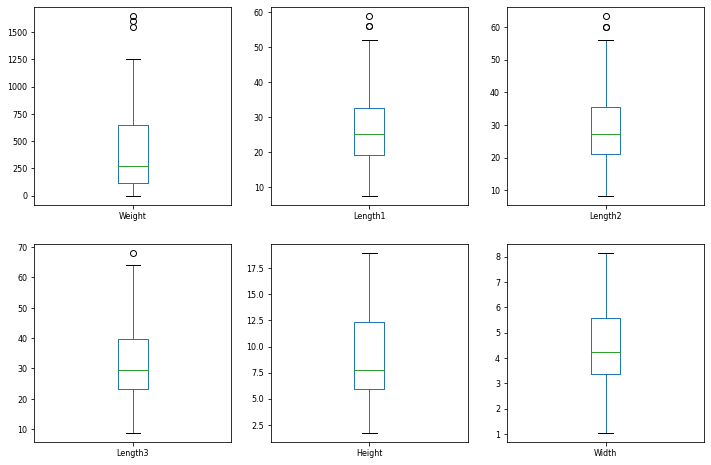

In [8]:
# Box and whisker plots
data.plot(kind='box', subplots=True, layout=(2, 3), sharex=False, fontsize=8, figsize=(12,8));
plt.show()

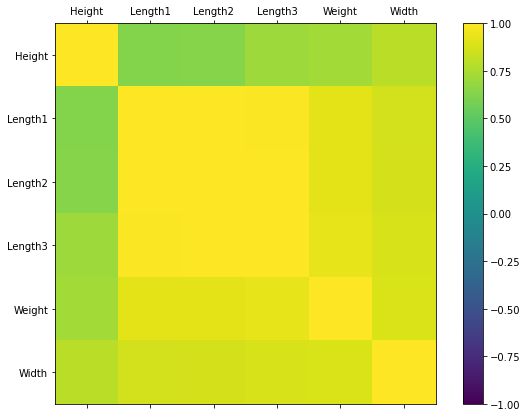

In [9]:
# Correlation matrix
cols = data.columns.difference(['Species']);
fig = plt.figure(figsize=(10, 7));
ax = fig.add_subplot(111);
cax = ax.matshow(data[cols].corr(method='pearson'), vmin=-1, vmax=1);
fig.colorbar(cax);
ticks = np.arange(0, 6, 1);
ax.set_xticks(ticks);
ax.set_yticks(ticks);
ax.set_xticklabels(cols);
ax.set_yticklabels(cols);
plt.show()

## 3. Processing

In [10]:
# Some processing

## 4. Transformation

In [11]:
# Categorical
data = pd.get_dummies(data, columns=['Species'])

# Numerical
data[cols] = StandardScaler().fit_transform(data[cols])
data.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,-0.438072,-0.305789,-0.282303,-0.106020,0.596579,-0.236529,1,0,0,0,0,0,0
1,-0.303562,-0.225507,-0.198054,-0.002337,0.821261,-0.066579,1,0,0,0,0,0,0
2,-0.163448,-0.235542,-0.179332,-0.010977,0.797341,0.165793,1,0,0,0,0,0,0
3,-0.098995,0.005302,0.054694,0.196390,0.879771,0.022621,1,0,0,0,0,0,0
4,0.088759,0.025372,0.054694,0.239592,0.812835,0.426371,1,0,0,0,0,0,0


## 5. Split data & Fitting models

In [12]:
# Select main columns to be used in training
main_cols = data.columns.difference(['Weight']); 
X = data[main_cols];
y = data['Weight']

In [13]:
# Split out test and validation dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42); # test
# X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42); # validation

# Cross validation
kfold = KFold(n_splits=3,  shuffle=True, random_state=21);

In [14]:
# Fitting
linears = [];
linears.append(('LR', LinearRegression()));
linears.append(('RIDGE', Ridge()));
linears.append(('LASSO', Lasso()));

# Evaluate
for name, model in linears:
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kfold);
    print('%s : %.4f(%.4f)' % (name, -1 * scores.mean(), scores.std()));

LR : 0.0983(0.0038)
RIDGE : 0.1024(0.0123)
LASSO : 1.0191(0.2344)


## 6. Evaluate on test data

In [15]:
# Fit the best model
mod = LinearRegression();
mod = mod.fit(X_train, y_train);
y_pred = mod.predict(X_test);

In [16]:
# Evaluate each model in turn with kfold
print('Score :', mean_squared_error(y_test, y_pred));

Score : 0.05964686930026991


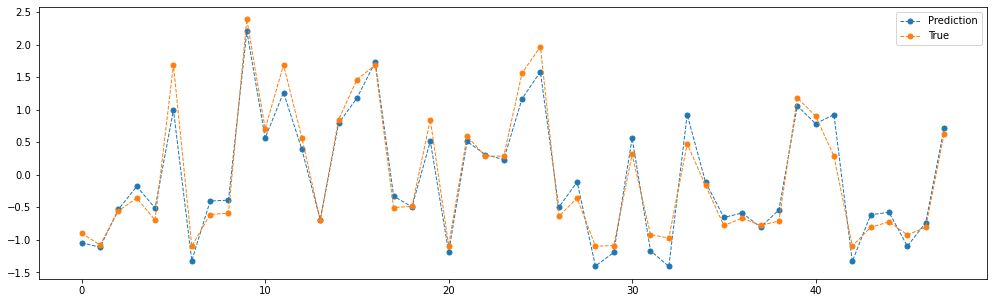

In [17]:
# Plotting predicted and true values
plt.figure(figsize=(17, 5))
plt.plot(np.arange(0, len(y_pred)), y_pred, 'o', linestyle='dashed', linewidth=1, markersize=5, label='Prediction')
plt.plot(np.arange(0, len(y_test)), y_test, 'o', linestyle='dashed', linewidth=1, markersize=5, label='True')
plt.legend()
plt.show()

## 7. Make persitent preprocessing data

In [18]:
data.to_csv('pre_fish.csv', index=False);